# Student alcohol consumption

**Data Set Information**

Secondary school student alcohol consumption data with social, gender and study information. The data were obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students.

**Attribute Information**

*The inputs are as follows:*

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

*The outputs are as follows:*

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

**Buvo reikalingos šios komandos Anaconda prompt'e:**

conda install -c conda-forge pyproj


In [2]:
from pyproj import Proj, transform
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from itertools import product
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
#Importuoju duomenis:
Duomenys=pd.read_csv('Duomenys.csv')

#Tvarkau duomenis. String, nominal reikšmes paverčiu numerical:
Duomenys['school'] = Duomenys['school'].map({'GP': 1, 'MS': 0})
Duomenys['sex'] = Duomenys['sex'].map({'M': 1, 'F': 0})
Duomenys['address'] = Duomenys['address'].map({'U': 1, 'R': 0})
Duomenys['famsize'] = Duomenys['famsize'].map({'GT3': 1, 'LE3': 0})
Duomenys['Pstatus'] = Duomenys['Pstatus'].map({'T': 1, 'A': 0})
Duomenys['Mjob'] = Duomenys['Mjob'].map({'teacher': 4, 'health': 3, 'services': 2, 'at_home': 1, 'other': 0})
Duomenys['Fjob'] = Duomenys['Fjob'].map({'teacher': 4, 'health': 3, 'services': 2, 'at_home': 1, 'other': 0})
Duomenys['reason'] = Duomenys['reason'].map({'home': 3, 'reputation': 2, 'course': 1, 'other':0})
Duomenys['guardian'] = Duomenys['guardian'].map({'mother': 2, 'father': 1, 'other':0})
Duomenys['schoolsup'] = Duomenys['schoolsup'].map({'yes': 1, 'no': 0})
Duomenys['famsup'] = Duomenys['famsup'].map({'yes': 1, 'no': 0})
Duomenys['paid'] = Duomenys['paid'].map({'yes': 1, 'no': 0})
Duomenys['activities'] = Duomenys['activities'].map({'yes': 1, 'no': 0})
Duomenys['nursery'] = Duomenys['nursery'].map({'yes': 1, 'no': 0})
Duomenys['higher'] = Duomenys['higher'].map({'yes': 1, 'no': 0})
Duomenys['internet'] = Duomenys['internet'].map({'yes': 1, 'no': 0})
Duomenys['romantic'] = Duomenys['romantic'].map({'yes': 1, 'no': 0})






In [31]:
Duomenys.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.473418,16.696203,0.777215,0.711392,0.896203,2.749367,2.521519,1.516456,1.043038,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.421948,1.294530,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,1.000000,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


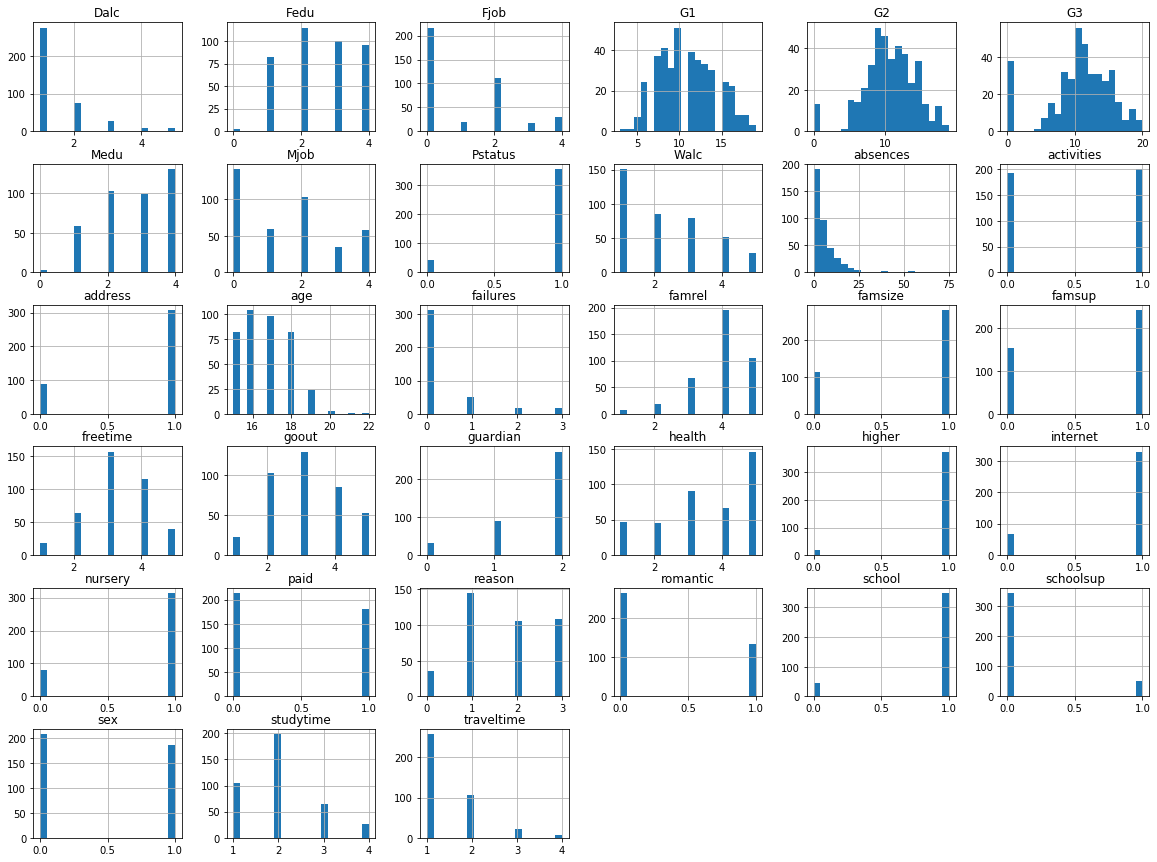

In [32]:
Duomenys.hist(bins=20, figsize=(20,15))
plt.show()

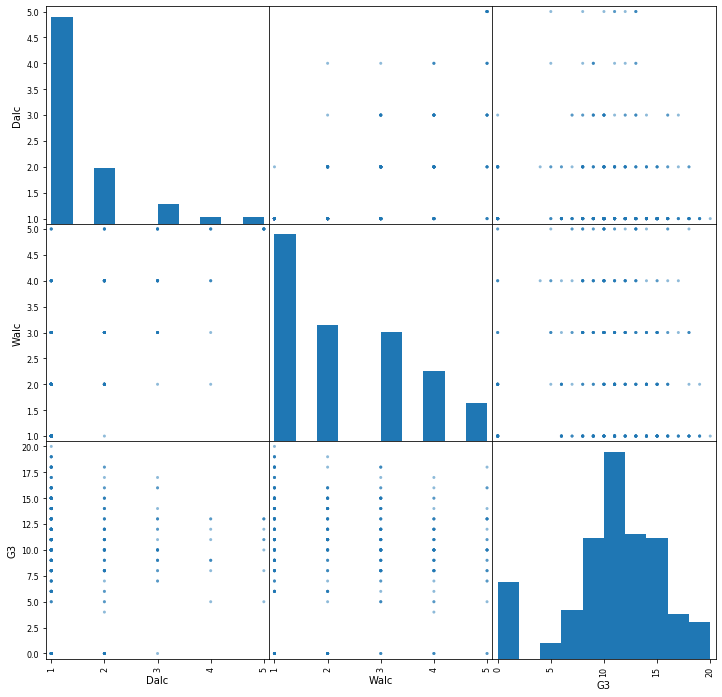

In [16]:
scatter_matrix(Duomenys[["Dalc", "Walc", "G3"]], figsize=(12, 12))
plt.show()

Iš grafikų aukščiau kol kas akivaizdžiai matosi, kad aukščiausius pažymius gauna tie, kurie alkoholį tiek darbo, tiek savaitgalio dienomis vartoja mažiau.

Yra atvejų, kai 'alkoholikai' mokosi geriau nei alkoholio beveik nevartojantys.

**Trumpai - iš grafikų dar ne visiškai aišku, kaip (ar) mokslų rezultatai priklauso nuo alkoholio vartojimo.**

# Test and Train data

Skaidau duomenis atsitiktiniu būdu.

In [104]:
np.random.seed(10)
mask = np.random.rand(Duomenys.shape[0]) <= 0.8

print('Train set shape {0}, test set shape {1}'.format(Duomenys[mask].shape, Duomenys[~mask].shape))

Train set shape (323, 33), test set shape (72, 33)


# Tiesinės regresijos modelis

In [105]:
lr = LinearRegression()
lr.fit(Duomenys[mask].drop(['G1', # kintamąjį išmetu, nes jis kaip ir nesvarbus - jo neprognozuoju ir jis yra G3 sudėtinė dalis
                           'G2',    # kintamąjį išmetu, nes jis kaip ir nesvarbus - jo neprognozuoju ir jis yra G3 sudėtinė dalis
                           'G3'],  # kintamąjį išmetu, nes prognozuoju
                          axis=1),  # X_train
       Duomenys[mask]['G3'])        # y_train



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
pred = lr.predict(Duomenys[~mask].drop(['G1', 'G2',
                                'G3'], axis=1))   # X_test
print('RMSE = {0:.02f}'.format(
    np.sqrt(np.mean((pred - Duomenys[~mask]['G3'])**2))))   # pred - y_test

RMSE = 4.65


**Kurie stulpai (kintamieji) yra svarbiausi?**

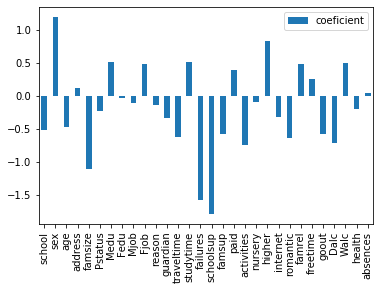

In [103]:
pd.DataFrame(lr.coef_, index=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'], 
             columns=['coeficient']).plot(kind='bar')

Iš grafiko aukščiau matau, kad alkoholio vartojimas tiek darbo, tiek savaitgalio dienomis nėra pats svarbiausias kintamasis.

Bandysiu susikurti naujų kintamųjų.
